## This script generates a graph with the statistics of the most used programming languages on GitHub itself.

#### Author: Wellerson Prenholato

In [1]:
#Importação da bibliotecas
import pandas as pd
import numpy as np 
from github import Github
import getpass
from functools import reduce
import math
from operator import itemgetter, attrgetter
from matplotlib import pyplot as plt

In [2]:
g = Github('WellersonPrenholato', getpass.getpass('Senha:'))

Senha:········


In [3]:
usedLanguages={}
for repo in g.get_user().get_repos():
    repoLangs = repo.get_languages()
    for lang in repoLangs:
        if lang in usedLanguages:
            usedLanguages[lang] += repoLangs[lang]
        else:
            usedLanguages[lang] = repoLangs[lang]

# print(usedLanguages)

In [4]:
# total = reduce(lambda x, value:x + value, usedLanguages.values(), 0)
# total

In [5]:
#Talvez transformar o valor incial encontrado em um dataframe e depois realizar os cálculos para mudança de porcentagem

In [6]:
conjLinguagens = [];
pesoLinguagens = [];
for linguagem, peso in zip(list(usedLanguages.keys()), list(usedLanguages.values())):
    conjLinguagens.append(linguagem)
    pesoLinguagens.append(peso)

In [7]:
armazena_data = {'Linguagens': conjLinguagens, 'Peso': pesoLinguagens};

In [8]:
#Transforma o conjunto de listas em um dataframe
data = pd.DataFrame(armazena_data)

In [9]:
#Gera um arquivo csv com todas linguagens utilizadas
data.to_csv('Linguagens.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [10]:
data.sort_values(by=['Peso'], ascending=False, inplace=True)

In [11]:
#Lista com todas as linguagens que desejamos remover
listRemove = ['HTML', 'CSS', 'Jupyter Notebook', 'PHP'];

for remove in listRemove:
    data = data.drop(data[(data.Linguagens == remove)].index)

In [12]:
#Gera o arquivo csv com todas linguages utilizadas no próprio github
data.to_csv('Linguagens.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [13]:
data = pd.read_csv('Linguagens.csv', encoding='ISO-8859-1', sep=';')

In [14]:
# Seleciona um número x de linguagens
qtdLanguages = 6
indices=[x for x in data.index if (x >= qtdLanguages)]
data.drop(indices, inplace=True)

In [15]:
data.head(20)

,Linguagens,Peso
0,Python,1930717
1,JavaScript,1730373
2,C,1275500
3,TypeScript,299566
4,C++,164574
5,Java,153410


In [16]:
total = data['Peso'].sum()
# total = reduce(lambda x, value: x + value, data['Peso'], 0)
total

5554140

In [17]:
data['Peso'] = pd.to_numeric(data['Peso'], downcast='float')

In [18]:
data.dtypes

Linguagens     object
Peso          float32
dtype: object

In [19]:
for index, row in data.iterrows():
    data.at[index, 'Peso'] /= total
    data.at[index, 'Peso'] = round(data.at[index, 'Peso'] * 100, 3)
    print(data.at[index, 'Peso'])

34.762
31.155
22.965
5.394
2.963
2.762


In [20]:
#Verificação da porcentagem total
data['Peso'].sum()

100.001

In [21]:
data.head(10)

,Linguagens,Peso
0,Python,34.762001
1,JavaScript,31.155001
2,C,22.965000
3,TypeScript,5.394000
4,C++,2.963000
5,Java,2.762000


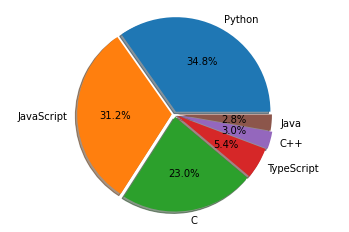

In [22]:
vendas = data['Peso']
labels = data['Linguagens']

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.03, 0.03, 0.03, 0.03, 0.05 ,0.03) 

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(vendas, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)

# inseri a legenda e a localização da legenda.
# plt.legend(labels, loc=7)

# define que o gráfico será plotado em circulo
plt.axis('equal')

plt.savefig('linguages-statistics.png')
plt.show()